In [1]:
%%writefile explore.py
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-colorblind')

# 2018.11.07 Created by Eamon.Zhang
# copied from https://github.com/daniel-dc-cd/feature-engineering-and-feature-selection/blob/master/data_exploration/explore.py

def get_dtypes(data,drop_col=[]):
    """Return the dtypes for each column of a pandas Dataframe

    Parameters
    ----------
    data : pandas Dataframe

    drop_col : columns to omit in a list

    Returns
    -------
    str_var_list, num_var_list, all_var_list
    
    """

    name_of_col = list(data.columns)
    num_var_list = []
    str_var_list = []
    all_var_list = []

    str_var_list = name_of_col.copy()
    for var in name_of_col:
        # check if column belongs to numeric type
        if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                               np.float64, np.float32, np.double)):
            str_var_list.remove(var)
            num_var_list.append(var)
    # drop the omit column from list
    for var in drop_col:
        if var in str_var_list:
            str_var_list.remove(var)
        if var in num_var_list:
            num_var_list.remove(var)

    all_var_list.extend(str_var_list)
    all_var_list.extend(num_var_list)
    return str_var_list, num_var_list, all_var_list


def describe(data,output_path=None):
    """output the general description of a  pandas Dataframe
       into a csv file
    
    """
    
    result = data.describe(include='all')
    if output_path is not None:
        output = os.path.join(output_path,'describe.csv')
        result.to_csv(output)
        print('result saved at:', str(output))
    return result
    
    
def discrete_var_barplot(x,y,data,output_path=None):
    """draw the barplot of a discrete variable x against y(target variable). 
    By default the bar shows the mean value of y.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """
    
    plt.figure(figsize=(15,10))
    sns.barplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Barplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)   
        print('Image saved at', str(output))
    
    
def discrete_var_countplot(x,data,output_path=None):
    """draw the countplot of a discrete variable x.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.countplot(x=x,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Countplot_'+str(x)+'.png')
        plt.savefig(output) 
        print('Image saved at',str(output))


def discrete_var_boxplot(x,y,data,output_path=None):
    """draw the boxplot of a discrete variable x against y.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
        
    plt.figure(figsize=(15,10))
    sns.boxplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Boxplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output) 
        print('Image saved at',str(output))


def continuous_var_distplot(x,output_path=None,bins=None):
    """draw the distplot of a continuous variable x.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.distplot(a=x,kde=False,bins=bins)
    if output_path is not None:
        output=os.path.join(output_path,'Distplot_'+str(x.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))    
    
    
# 2018.11.28 Created by Eamon.Zhang 

def scatter_plot(x,y,data,output_path=None):
    """draw the scatter-plot of two variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Scatter_plot_'+str(x.name)+'_'+str(y.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))       
        
    
def correlation_plot(data,output_path=None):
    """draw the correlation plot between variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    corrmat = data.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(corrmat,cmap="YlGnBu",linewidths=.5,annot=True)
    if output_path is not None:
        output = os.path.join(output_path,'Corr_plot'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))  
    
    
def heatmap(data,output_path=None,fmt='d'):
    """draw the heatmap between 2 variables.

    Parameters
    ----------


    Returns
    -------
    figure save as PNG
    """    
    
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(data,cmap="YlGnBu",linewidths=.5,annot=True,fmt=fmt)
    if output_path is not None:
        output = os.path.join(output_path,'Heatmap'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output)) 

Writing explore.py


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-colorblind')
%matplotlib inline
import explore

## Read the dataset

In [3]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/feature-engineering-and-feature-selection/master/data/titanic.csv', usecols=use_cols)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


## Get dtypes for each columns

In [6]:
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)

In [7]:
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['Sex']
['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']
['Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Fare']


## General data description

In [8]:
!mkdir output
explore.describe(data=data,output_path=r'./output/')

result saved at: ./output/describe.csv


,Survived,Pclass,Sex,Age,SibSp,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,7.910400
50%,0.000000,3.000000,NaN,28.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,38.000000,1.000000,31.000000


## Discrete variable barplot
draw the barplot of a discrete variable x against y(target variable). 
By default the bar shows the mean value of y.

Image saved at ./output/Barplot_Pclass_Survived.png


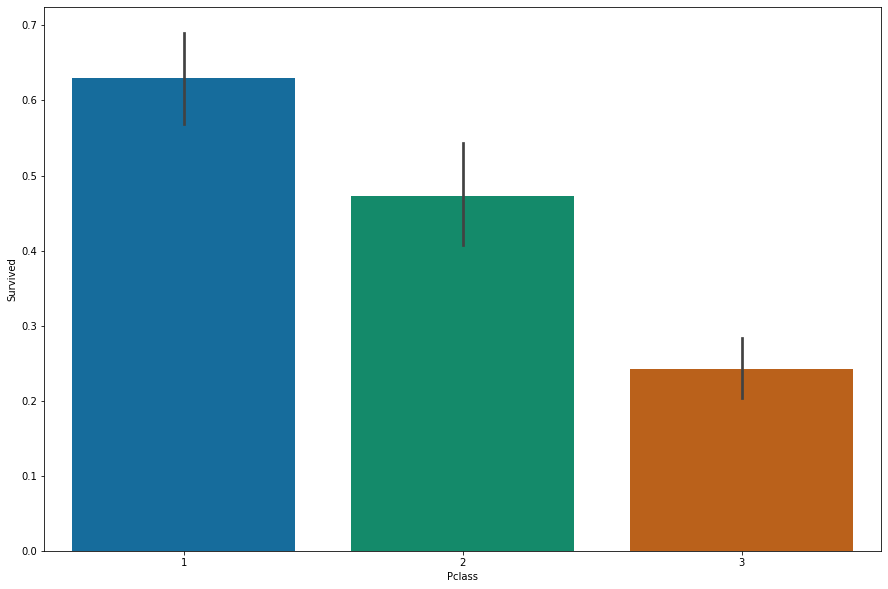

In [9]:
explore.discrete_var_barplot(x='Pclass',y='Survived',data=data,output_path='./output/')

## Discrete variable countplot
draw the countplot of a discrete variable x

Image saved at ./output/Countplot_Pclass.png


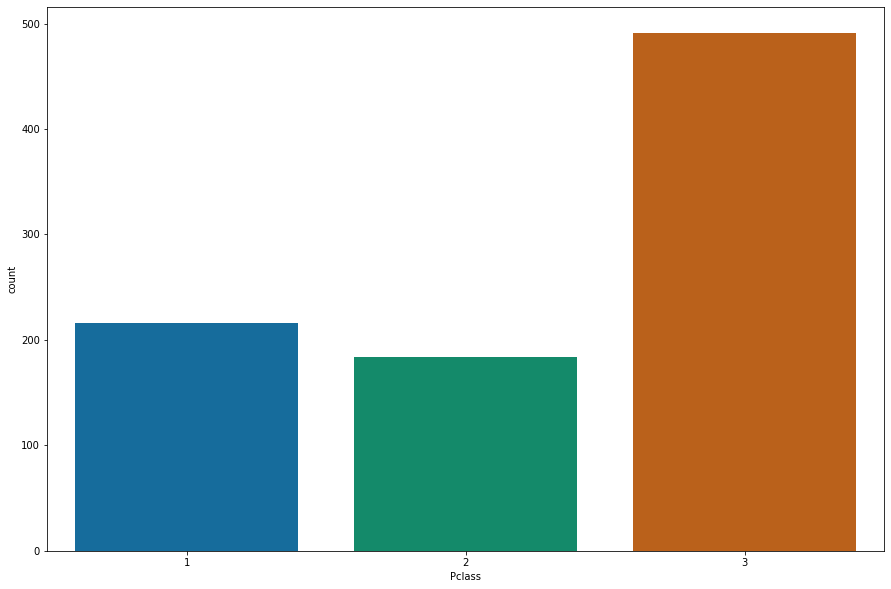

In [10]:
explore.discrete_var_countplot(x='Pclass',data=data,output_path='./output/')

## Discrete variable boxplot
draw the boxplot of a discrete variable x against y.

Image saved at ./output/Boxplot_Pclass_Fare.png


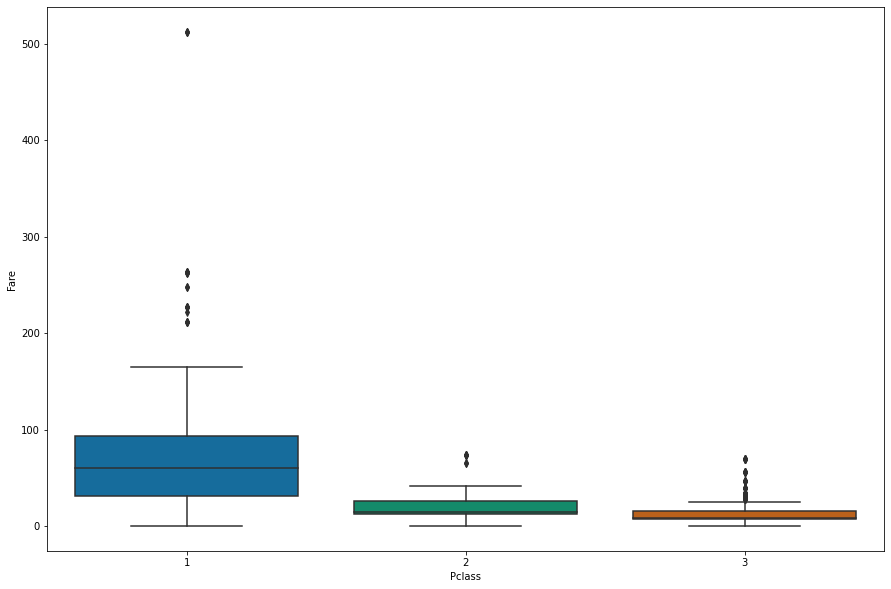

In [11]:
explore.discrete_var_boxplot(x='Pclass',y='Fare',data=data,output_path='./output/')

## Continuous variable distplot
draw the distplot of a continuous variable x.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Image saved at ./output/Distplot_Fare.png


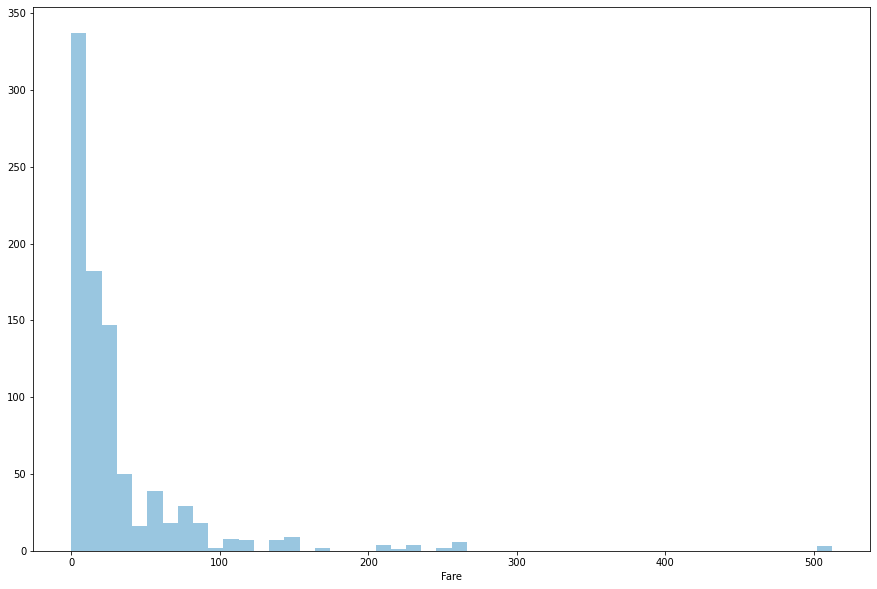

In [12]:
explore.continuous_var_distplot(x=data['Fare'],output_path='./output/')

## Scatter plot
draw the scatter-plot of two variables.

Image saved at ./output/Scatter_plot_Fare_Pclass.png


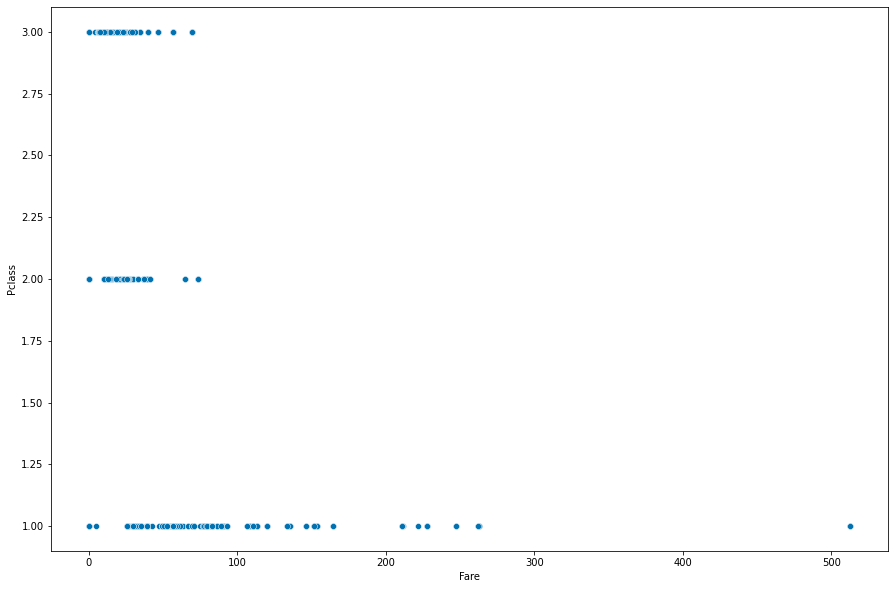

In [13]:
explore.scatter_plot(x=data.Fare,y=data.Pclass,data=data,output_path='./output/')

## Correlation plot
draw the correlation plot between variables.

Image saved at ./output/Corr_plot.png


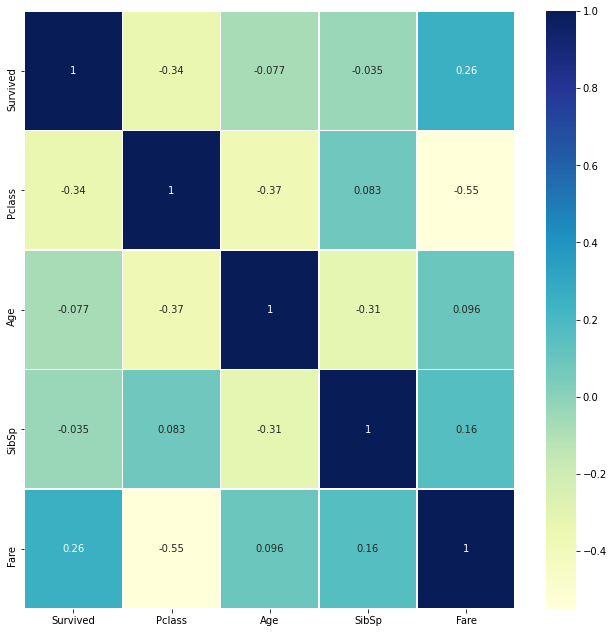

In [14]:
explore.correlation_plot(data=data,output_path='./output/')

## Heatmap

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
Image saved at ./output/Heatmap.png


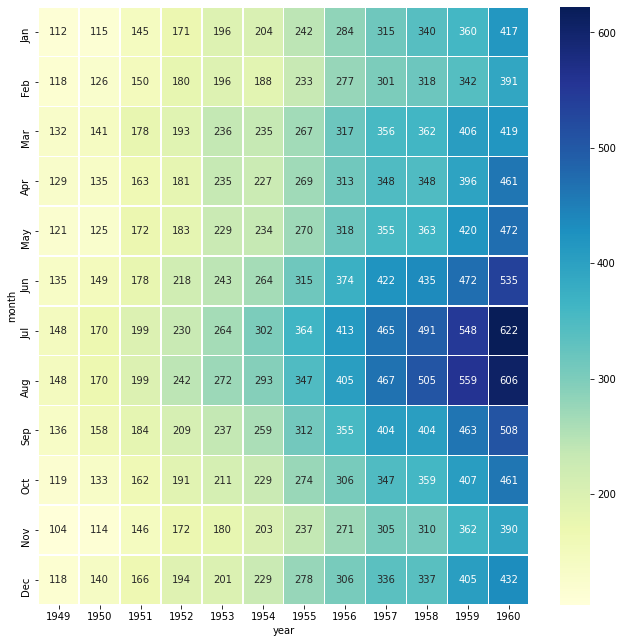

In [15]:
flights = sns.load_dataset("flights")
print(flights.head(5))
# explore.heatmap(data=data[['Sex','Survived']])
flights = flights.pivot("month", "year", "passengers")
explore.heatmap(data=flights,output_path='./output/')